## Ejercicio 1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from braket.circuits import Circuit
from braket.devices import LocalSimulator

In [5]:
circuit = Circuit().h(0)
print(circuit)

device1 = LocalSimulator()
result1 = device1.run(circuit, shots=1000).result()
counts1 = result1.measurement_counts

device2 = LocalSimulator(backend="braket_dm")
result2 = device2.run(circuit, shots=1000).result()
counts2 = result2.measurement_counts

print("Simulator \"default\": ", counts1)
print("Simulator \"braket_dm\": ", counts2)

T  : |0|
        
q0 : -H-

T  : |0|
Simulator "default":  Counter({'1': 512, '0': 488})
Simulator "braket_dm":  Counter({'1': 513, '0': 487})


/home/markel/.local/lib/python3.9/site-packages/braket/default_simulator/simulator.py:156: UserWarning: You are running a noise-free circuit on the density matrix simulator. Consider running this circuit on the state vector simulator: LocalSimulator("default") for a better user experience.
  warnings.warn(


Text(0, 0.5, 'Counts')

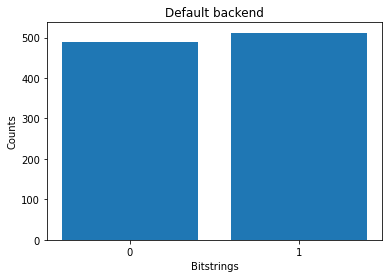

In [6]:
plt.bar(counts1.keys(), counts1.values())
plt.title("Default backend")
plt.xlabel('Bitstrings')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

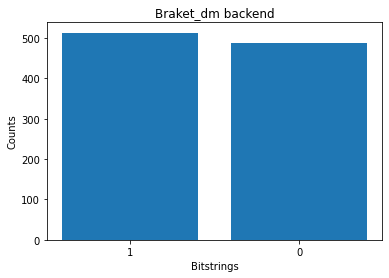

In [7]:
plt.bar(counts2.keys(), counts2.values())
plt.title("Braket_dm backend")
plt.xlabel('Bitstrings')
plt.ylabel('Counts')

Ambos _backends_ obtienen un resultado similar a la hora de producir númenros aleatorios. Para el primer set de resultados se ha utilizado un simulador vectorial de estado local mientras que para el resundo par de resultados se ha utilizado un simulador de matriz de densidad local que suele ser menos potente que el anterior y con la diferencia de que suele usarse para crear prototipos rapidos en circuitos pequeños con ruido.

## Ejercicio 2

In [17]:
from braket.circuits import Circuit
from braket.devices import LocalSimulator
import matplotlib.pyplot as plt
from math import pi

##### Versión 1 con rotaciones

In [30]:
device = LocalSimulator()

circuit = Circuit()

circuit.h(1)
circuit.cnot(2, 1)
# add a barrier
circuit.rx(0, pi/4)
# add a barrier
circuit.cnot(1,0)
circuit.h(0)
# add a barrier
circuit.cnot(2,1)
circuit.cz(2,0)
# add a barrier
circuit.rx(0, -pi/4)

print(circuit)

T  : |    0    |1|2|3|4|    5     |
                                   
q0 : -Rx(0.785)---X-H-Z-Rx(-0.785)-
                  |   |            
q1 : -H---------X-C-X-|------------
                |   | |            
q2 : -----------C---C-C------------

T  : |    0    |1|2|3|4|    5     |


In [34]:
device1 = LocalSimulator()
result1 = device1.run(circuit, shots=1000).result()
counts1 = result1.measurement_counts

device2 = LocalSimulator(backend="braket_dm")
result2 = device2.run(circuit, shots=1000).result()
counts2 = result2.measurement_counts

print("Simulator \"default\": ", counts1)
print("Simulator \"braket_dm\": ", counts2)

Simulator "default":  Counter({'010': 385, '100': 367, '110': 126, '000': 122})
Simulator "braket_dm":  Counter({'100': 393, '010': 372, '110': 120, '000': 115})


/home/markel/.local/lib/python3.9/site-packages/braket/default_simulator/simulator.py:156: UserWarning: You are running a noise-free circuit on the density matrix simulator. Consider running this circuit on the state vector simulator: LocalSimulator("default") for a better user experience.
  warnings.warn(


Text(0, 0.5, 'Counts')

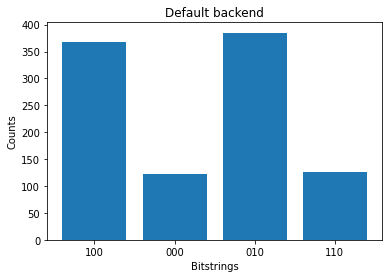

In [35]:
plt.bar(counts1.keys(), counts1.values())
plt.title("Default backend")
plt.xlabel('Bitstrings')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

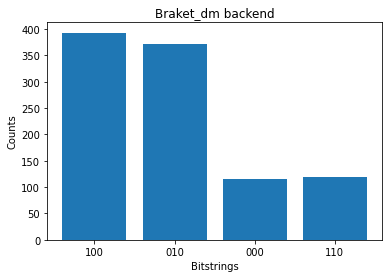

In [36]:
plt.bar(counts2.keys(), counts2.values())
plt.title("Braket_dm backend")
plt.xlabel('Bitstrings')
plt.ylabel('Counts')

Como podemos ver ambos _backends_ en la versión 1 los valores '000' y '110' son muy parecidos al igual que los valores '100' y '010' lo que indica que la teleportación está funcionando.

##### Versión 2 sin rotaciones

In [37]:
circuit2 = Circuit()

circuit2.h(1)
circuit2.cnot(1, 2)
circuit2.cnot(0, 1)
circuit2.h(0)
circuit2.cnot(1, 2)
circuit2.cz(0, 2)

print(circuit2)

T  : |0|1|2|3|4|
                
q0 : -----C-H-C-
          |   | 
q1 : -H-C-X-C-|-
        |   | | 
q2 : ---X---X-Z-

T  : |0|1|2|3|4|


In [43]:
device3 = LocalSimulator()
result3 = device3.run(circuit2, shots=1000).result()
counts3 = result3.measurement_counts

device4 = LocalSimulator(backend="braket_dm")
result4 = device4.run(circuit2, shots=1000).result()
counts4 = result4.measurement_counts

print("Simulator \"default\": ", counts3)
print("Simulator \"braket_dm\": ", counts4)

Simulator "default":  Counter({'100': 260, '110': 260, '010': 244, '000': 236})
Simulator "braket_dm":  Counter({'000': 260, '110': 251, '100': 248, '010': 241})


/home/markel/.local/lib/python3.9/site-packages/braket/default_simulator/simulator.py:156: UserWarning: You are running a noise-free circuit on the density matrix simulator. Consider running this circuit on the state vector simulator: LocalSimulator("default") for a better user experience.
  warnings.warn(


Text(0, 0.5, 'Counts')

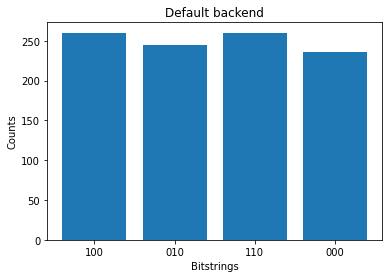

In [44]:
plt.bar(counts3.keys(), counts3.values())
plt.title("Default backend")
plt.xlabel('Bitstrings')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

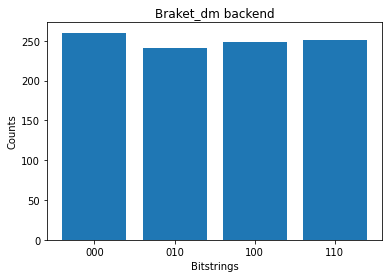

In [45]:
plt.bar(counts4.keys(), counts4.values())
plt.title("Braket_dm backend")
plt.xlabel('Bitstrings')
plt.ylabel('Counts')

Al igual que con la versión 1 podemos ver que ambos _backends_ en la versión 2 los valores '100' y '110' son muy parecidos lo que indica que la teleportación está funcionando.

## Ejercicio 3

In [51]:
from braket.circuits import Circuit
from braket.devices import LocalSimulator
import matplotlib.pyplot as plt

In [52]:
# Función para ejecutar tareas cuánticas, comprobar el estado de las mismas y recoger resultados
def get_result(device, circ):
    # Obtener número de qubits
    num_qubits = circuito.qubit_count
    # Establecer los resultados deseados
    circ.probability()

    task = device.run(circ, shots=1000)

    # Esperar a que termine la tarea
    status_list = []
    status = task.state()
    status_list += [status]
    print('\nEstado:', status)

    # Solo notificar al usuario cuando hay un cambio de estado
    while status != 'COMPLETED':
        status = task.state()
        if status != status_list[-1]:
            print('Estado:', status)
        status_list += [status]

    result = task.result()
    # Obtener las probabilidades de salida
    probs_values = result.values[0]
    # Obtener los resultados de las mediciones
    measurement_counts = result.measurement_counts

    print('Resultados de la medición:', measurement_counts)

    format_bitstring = '{0:0' + str(num_qubits) + 'b}'
    bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]

    plt.bar(bitstring_keys, probs_values)
    plt.xlabel('Bits')
    plt.ylabel('Probabilidad')
    plt.xticks(rotation=90)
    plt.show() 
    
    return measurement_counts

T  : |0|1|2|3|4|
                
q0 : -H-C-X-C-H-
        |   |   
q1 : ---X---X---

T  : |0|1|2|3|4|

Estado: COMPLETED
Resultados de la medición: Counter({'01': 1000})


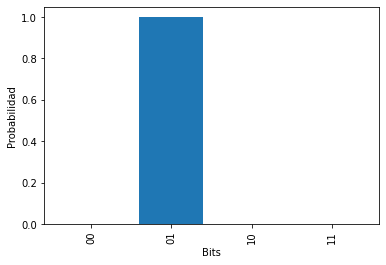

Counter({'01': 1000})


In [53]:
device = LocalSimulator()

# Alice y Bob inicialmente comparten un par de Bell
circuito = Circuit()
circuito.h([0])
circuito.cnot(0,1)

# Definimos el esquema de codificación de Alice según la tabla
mensaje = {"00": Circuit().i(0),
           "01": Circuit().x(0),
           "10": Circuit().z(0),
           "11": Circuit().x(0).z(0)
        }

# Elegimos el mensaja a enviar
m = "01"

# Alice codifica su mensaje aplicando las puertas definidas anteriormente
circuito.add_circuit(mensaje[m])

# Alice envía su qubit a Bob para que Bob tenga ambos qubits. Bob decodifica el mensaje de Alice desenredando los dos qubits
circuito.cnot(0,1)
circuito.h([0])

print(circuito)

# Al medir los dos qubits en la base computacional, Bob puede leer el mensaje de dos qubits de Alice
counts = get_result(device, circuito)
print(counts)

Al medir los dos qubits en la base computacional, Bob puede leer el mensaje de dos qubits de Alice


Estado: COMPLETED
Resultados de la medición: Counter({'00': 1000})


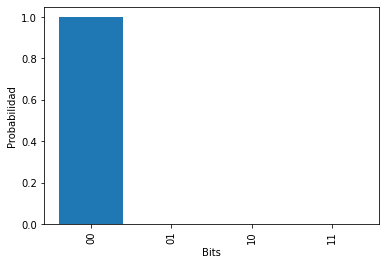

Mensaje: 00. Resultados:
Counter({'00': 1000})

Estado: COMPLETED
Resultados de la medición: Counter({'01': 1000})


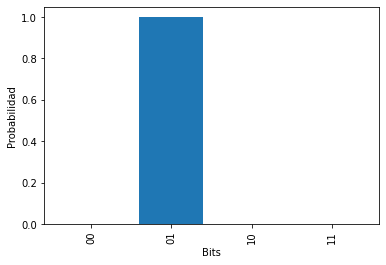

Mensaje: 01. Resultados:
Counter({'01': 1000})

Estado: COMPLETED
Resultados de la medición: Counter({'10': 1000})


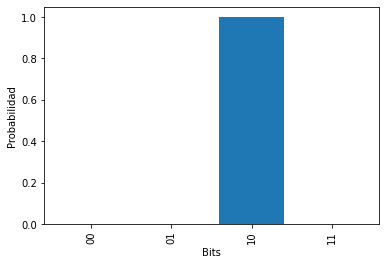

Mensaje: 10. Resultados:
Counter({'10': 1000})

Estado: COMPLETED
Resultados de la medición: Counter({'11': 1000})


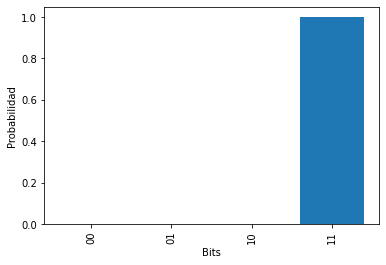

Mensaje: 11. Resultados:
Counter({'11': 1000})


In [54]:
# Ahora podemos comprobar que este esquema funciona también para los otros posibles mensajes.
for m in mensaje:
    # Reproducir el circuito completo anterior por concatenación de todas las puertas:
    circuito2 = Circuit().h([0]).cnot(0,1).add_circuit(mensaje[m]).cnot(0,1).h([0])
    # Correr el circuito
    counts = get_result(device, circuito2)
    
    print("Mensaje: " + m + ". Resultados:")
    print(counts)

Podemos comprobar que este circuito funciona también para los otros posibles mensajes.

## Ejercicio 4

### IBM

In [4]:
# Cargamos las credenciales de IBMQ
from qiskit import IBMQ

with open('qiskit.txt', 'r') as file:
	token = file.read()

# IBMQ.save_account(token, hub='ibm-q-education', group='uni-complutense-2', project='architecture-pro', overwrite=True)
IBMQ.save_account(token, overwrite=True)

##### Ejercicio 2

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, transpile, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from math import pi


In [2]:

alice_reg = QuantumRegister(2, name="alice")
bob_reg = QuantumRegister(1, name="bob")
circuito = QuantumCircuit(alice_reg, bob_reg)

circuito.h(alice_reg[1])
circuito.cx(alice_reg[1], bob_reg[0])

bob_class_reg = ClassicalRegister(1)
circuito.add_register(bob_class_reg)

circuito.barrier()

circuito.rx(pi/4, alice_reg[0])

circuito.barrier()

circuito.cx(alice_reg[0], alice_reg[1])
circuito.h(alice_reg[0])

circuito.barrier()

circuito.cx(alice_reg[1], bob_reg[0])
circuito.cz(alice_reg[0], bob_reg[0])

circuito.barrier()

circuito.rx(-pi/4, bob_reg[0])
circuito.measure(bob_reg[0], bob_class_reg)

circuito.draw()

░ ┌─────────┐ ░      ┌───┐ ░          ░                
alice_0: ───────────░─┤ Rx(π/4) ├─░───■──┤ H ├─░───────■──░────────────────
         ┌───┐      ░ └─────────┘ ░ ┌─┴─┐└───┘ ░       │  ░                
alice_1: ┤ H ├──■───░─────────────░─┤ X ├──────░───■───┼──░────────────────
         └───┘┌─┴─┐ ░             ░ └───┘      ░ ┌─┴─┐ │  ░ ┌──────────┐┌─┐
    bob: ─────┤ X ├─░─────────────░────────────░─┤ X ├─■──░─┤ Rx(-π/4) ├┤M├
              └───┘ ░             ░            ░ └───┘    ░ └──────────┘└╥┘
   c0: 1/════════════════════════════════════════════════════════════════╩═
                                                                         0

In [5]:
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and not b.configuration().simulator and b.status().operational==True))
print(backend)

transp_circ = transpile(circuito, backend, optimization_level=3)
job = backend.run(transp_circ).result()
counts = job.get_counts(circuito)

ibmq_quito
{'0': 3631, '1': 369}


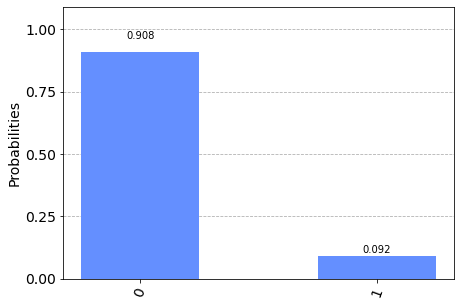

In [7]:
plot_histogram(counts)

##### Ejercicio 3

In [8]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram

In [9]:
circuito = QuantumCircuit(2)
circuito.h(1)
circuito.cx(1, 0)

circuito.barrier()

mensaje = '10'
if len(mensaje) != 2 or not set(mensaje).issubset({"0","1"}):
	raise ValueError(f"mensaje '{mensaje}' invalido")
if mensaje[1] == "1":
	circuito.x(1)
if mensaje[0] == "1":
	circuito.z(1)

circuito.barrier()
circuito.cx(1, 0)
circuito.h(1)
circuito.measure_all()

circuito.draw()

┌───┐ ░       ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├─░───────░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘ ░ ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░──╫─┤M├
        └───┘      ░ └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

ibmqfactory.load_account:WARNING:2022-03-05 10:50:52,494: Credentials are already in use. The existing account in the session will be replaced.


ibmq_lima


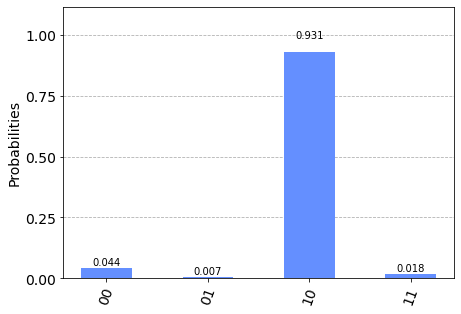

In [10]:
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
print(backend)

transp_circ = transpile(circuito, backend, optimization_level=3)
job = backend.run(transp_circ).result()
plot_histogram(job.get_counts(circuito))

### IonQ

#### Ejercicio 2

In [12]:
from braket.circuits import Circuit
from braket.aws import AwsDevice

##### Versión 1 con rotaciones

In [22]:
circuit = Circuit()

circuit.h(1)
circuit.cnot(2, 1)
# add a barrier
circuit.rx(0, pi/4)
# add a barrier
circuit.cnot(1,0)
circuit.h(0)
# add a barrier
circuit.cnot(2,1)
circuit.rz(2,0)
# add a barrier
circuit.rx(0, -pi/4)

print(circuit)

T  : |    0    |1|2|3|    4     |
                                 
q0 : -Rx(0.785)---X-H-Rx(-0.785)-
                  |              
q1 : -H---------X-C-X------------
                |   |            
q2 : -----------C---C-Rz(0)------

T  : |    0    |1|2|3|    4     |


In [23]:
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/IONQ")

print("Resultados: ", device.run(circuit, s3_folder).result().measurement_counts)

Resultados:  Counter({'100': 415, '010': 394, '000': 96, '110': 74, '001': 6, '101': 5, '011': 5, '111': 5})


##### Versión 2 sin rotaciones

In [24]:
circuit2 = Circuit()

circuit2.h(1)
circuit2.cnot(1, 2)
circuit2.cnot(0, 1)
circuit2.h(0)
circuit2.cnot(1, 2)
circuit2.rz(0, 2)

print(circuit2)

T  : |0|1|2|3|  4  |
                    
q0 : -----C-H-Rz(2)-
          |         
q1 : -H-C-X-C-------
        |   |       
q2 : ---X---X-------

T  : |0|1|2|3|  4  |


In [25]:
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/IONQ")

print("Resultados: ", device.run(circuit2, s3_folder).result().measurement_counts)

Resultados:  Counter({'100': 254, '000': 251, '010': 235, '110': 205, '101': 18, '001': 15, '011': 11, '111': 11})


#### Ejercicio 3

In [15]:
from braket.circuits import Circuit
from braket.devices import LocalSimulator
import matplotlib.pyplot as plt

In [16]:
# Alice y Bob inicialmente comparten un par de Bell
circuito = Circuit()
circuito.h([0])
circuito.cnot(0,1)

# Definimos el esquema de codificación de Alice según la tabla
mensaje = {"00": Circuit().i(0),
           "01": Circuit().x(0),
           "10": Circuit().z(0),
           "11": Circuit().x(0).z(0)
        }

# Elegimos el mensaja a enviar
m = "01"

# Alice codifica su mensaje aplicando las puertas definidas anteriormente
circuito.add_circuit(mensaje[m])

# Alice envía su qubit a Bob para que Bob tenga ambos qubits. Bob decodifica el mensaje de Alice desenredando los dos qubits
circuito.cnot(0,1)
circuito.h([0])

print(circuito)

device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/IONQ")

print("Resultados: ", device.run(circuito, s3_folder).result().measurement_counts)

T  : |0|1|2|3|4|
                
q0 : -H-C-X-C-H-
        |   |   
q1 : ---X---X---

T  : |0|1|2|3|4|
Resultados:  Counter({'01': 986, '11': 10, '00': 4})


### Rigeti

#### Ejercicio 2

In [17]:
from braket.circuits import Circuit
from braket.aws import AwsDevice

##### Versión 1 con rotaciones

In [18]:
circuit = Circuit()

circuit.h(1)
circuit.cnot(2, 1)
# add a barrier
circuit.rx(0, pi/4)
# add a barrier
circuit.cnot(1,0)
circuit.h(0)
# add a barrier
circuit.cnot(2,1)
circuit.cz(2,0)
# add a barrier
circuit.rx(0, -pi/4)

print(circuit)

device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/RIGETTI")

print("Resultados: ", device.run(circuit, s3_folder).result().measurement_counts)

T  : |    0    |1|2|3|4|    5     |
                                   
q0 : -Rx(0.785)---X-H-Z-Rx(-0.785)-
                  |   |            
q1 : -H---------X-C-X-|------------
                |   | |            
q2 : -----------C---C-C------------

T  : |    0    |1|2|3|4|    5     |
Resultados:  Counter({'100': 356, '010': 242, '000': 215, '110': 171, '101': 6, '001': 5, '011': 3, '111': 2})


##### Versión 2 sin rotaciones

In [19]:
circuit2 = Circuit()

circuit2.h(1)
circuit2.cnot(1, 2)
circuit2.cnot(0, 1)
circuit2.h(0)
circuit2.cnot(1, 2)
circuit2.cz(0, 2)

print(circuit2)

device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/RIGETTI")

print("Resultados: ", device.run(circuit2, s3_folder).result().measurement_counts)

T  : |0|1|2|3|4|
                
q0 : -----C-H-C-
          |   | 
q1 : -H-C-X-C-|-
        |   | | 
q2 : ---X---X-Z-

T  : |0|1|2|3|4|
Resultados:  Counter({'111': 332, '011': 189, '101': 134, '001': 109, '110': 71, '010': 61, '100': 58, '000': 46})


#### Ejercicio 3

In [20]:
from braket.circuits import Circuit
from braket.devices import LocalSimulator
import matplotlib.pyplot as plt

In [21]:
# Alice y Bob inicialmente comparten un par de Bell
circuito = Circuit()
circuito.h([0])
circuito.cnot(0,1)

# Definimos el esquema de codificación de Alice según la tabla
mensaje = {"00": Circuit().i(0),
           "01": Circuit().x(0),
           "10": Circuit().z(0),
           "11": Circuit().x(0).z(0)
        }

# Elegimos el mensaja a enviar
m = "01"

# Alice codifica su mensaje aplicando las puertas definidas anteriormente
circuito.add_circuit(mensaje[m])

# Alice envía su qubit a Bob para que Bob tenga ambos qubits. Bob decodifica el mensaje de Alice desenredando los dos qubits
circuito.cnot(0,1)
circuito.h([0])

print(circuito)

device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/RIGETTI")

print("Resultados: ", device.run(circuit, s3_folder).result().measurement_counts)

T  : |0|1|2|3|4|
                
q0 : -H-C-X-C-H-
        |   |   
q1 : ---X---X---

T  : |0|1|2|3|4|
Resultados:  Counter({'100': 382, '010': 232, '110': 199, '000': 163, '101': 9, '011': 6, '001': 5, '111': 4})
